In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt               
%matplotlib inline


In [3]:
from tensorflow.keras.datasets.mnist import load_data    # To load the MNIST digit dataset

(X_train, y_train) , (X_test, y_test) = load_data()      # Loading data

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
ix = np.random.choice(np.arange(X_train.shape[0]),9)
ix

array([46138, 18234, 13837, 54355, 38523, 18903, 55415, 26419, 40488])

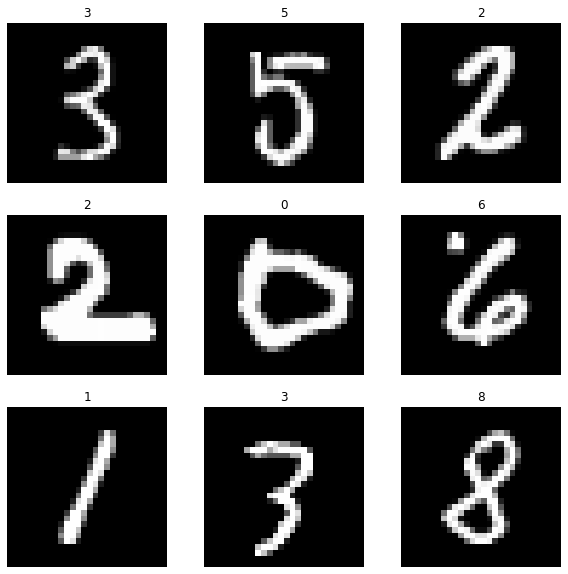

In [8]:
plt.figure(figsize = (10,10))
c = 1
for i in ix:
  ax = plt.subplot(3,3,c)
  plt.imshow(X_train[i],"gray")
  plt.title(y_train[i])
  c += 1
  plt.axis("off")
  # plt.tight_layout()


In [9]:
X_train[0].min(),X_train[0].max()

(0, 255)

In [10]:
# 0,255 değilde bunları bizim scale etmemiz İSTENİR.                 # 255 beyaz 0 ----> siyah

In [11]:
X_train_new = X_train / 255.0
X_test_new = X_test / 255.0

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [13]:
X_train_new.shape            # 28*28'Lik 60000 tane resmimiz var 

(60000, 28, 28)

In [14]:
# con2d'lerde  tensörün 3 boyutlu olması GEREKİYOR :  28*28*1 gibi olmalı 

In [15]:
X_train_new = X_train_new[...,np.newaxis]
X_test_new = X_test_new[...,np.newaxis]                        ## 60000 tane 28*28*1'Lik boyutumuz artık
X_train_new.shape

(60000, 28, 28, 1)

In [16]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size = (3,3),input_shape=(28,28,1),activation="relu"))           # yükseklik , genişlik ,derinkik
                                                                                                    # satır     , sütun    , kanal sayısı (rgb)
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size = (3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
 
## maxpoolingte operasyon yok af vs. yok aynı şekilde flatenda da poolda da eğitilecek parametre yoktur. 
## burası hala 3 boyutlu tensörler


model.add(Flatten())

model.add(Dense(64,activation="relu"))
model.add(Dense(10,activation="softmax"))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [17]:
y_train                       # 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

 # y_train rakamlar -------------------> ama benim outputum :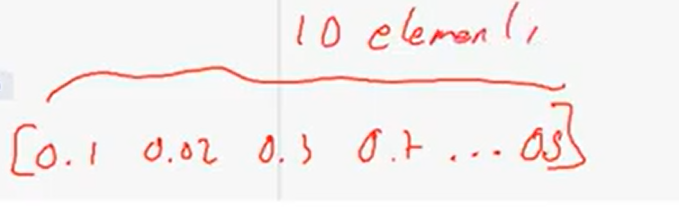

In [18]:
## y_train de şöyle olsa daha güzel olur aslında.

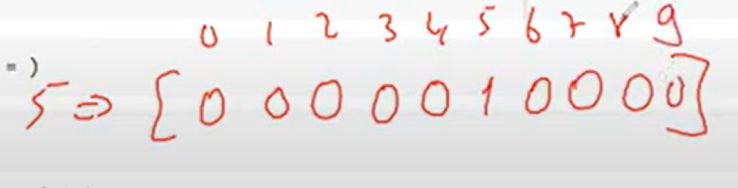

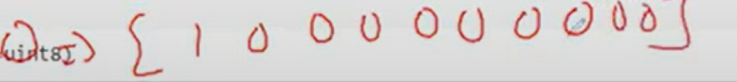

In [19]:
# y_train'i buna çevirmemize gerek yok **** tensorflow bizim yerimize yapacak. yani y_train : sparse matrix şeklinde loss'lardan sparse olanı seç

In [20]:
model.compile(optimizer = "adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics = ["accuracy"])
                                                                                   ##daha stabil gözükmesi için

In [21]:
model.fit(X_train_new, y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 17s 3ms/step - loss: 0.1484 - accuracy: 0.9553
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9847
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0261 - accuracy: 0.9919
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - accuracy: 0.9937


In [51]:
# biz gpu'dan çalıştırdığımız için bu kadar kısa sürdü cpu'da çalıştırsaydık daha uzun sürerdi.

In [22]:
model.evaluate(X_test_new,y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.9896


[0.03429204225540161, 0.9896000027656555]

In [23]:
## [loss,accuracy]

In [24]:
y_pred = model.predict(X_test_new)
y_pred[0]

array([7.2204115e-10, 2.7111996e-10, 1.3970961e-08, 1.5042813e-08,
       3.7755119e-09, 6.0240977e-09, 1.5279589e-15, 9.9999785e-01,
       1.4021302e-09, 2.1629612e-06], dtype=float32)

In [25]:
## output layerda 10 tane nöron oldupundan 10 elemanlı array verdi bize.

In [26]:
np.argmax(y_pred[0])

7

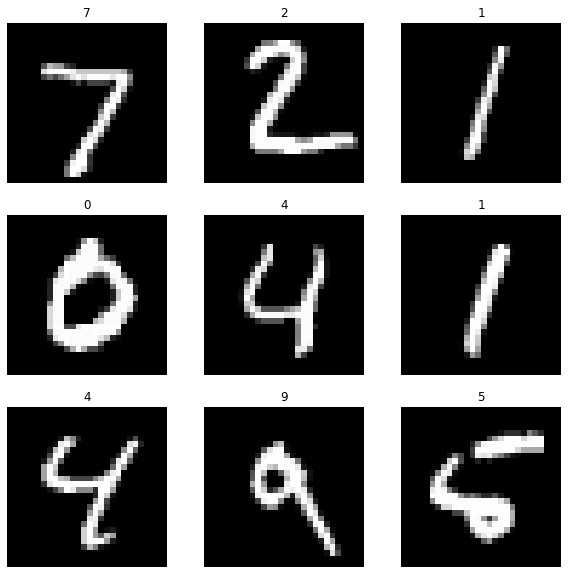

In [27]:
plt.figure(figsize = (10,10))

for i in range(9):
  ax = plt.subplot(3,3,i+1)
  plt.imshow(X_test[i],"gray")
  plt.title(np.argmax(y_pred[i]))
  plt.axis("off")
  # plt.tight_layout()


In [28]:
y_test[8]

5

## NERELERİ YANLIŞ YAPMIŞIZ

In [29]:
y_pred.shape           # 10000 tane test datamız var 10 tane nöronum vardı output

(10000, 10)

In [32]:
y_pred_label = np.argmax(y_pred,axis=1)                  # her bir satırın hangi sütun indexi en büyük onu bulmuş oluyoruz ? 
y_pred_label.shape

(10000,)

In [33]:
y_pred_label

array([7, 2, 1, ..., 4, 5, 6])

In [34]:
y_test == y_pred_label

array([ True,  True,  True, ...,  True,  True,  True])

In [35]:
y_test != y_pred_label

array([False, False, False, ..., False, False, False])

9
5


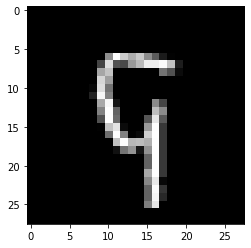

In [42]:
ix = y_test != y_pred_label



print(y_test[ix][0])
print(y_pred_label[ix][0])

plt.imshow(X_test[ix][0],"gray")

In [43]:
y_pred[ix][0]

array([1.34963045e-08, 9.81578374e-09, 3.78054352e-08, 1.70920657e-06,
       3.31885462e-06, 7.67867863e-01, 2.04227923e-09, 3.75094078e-06,
       1.33636495e-05, 2.32109994e-01], dtype=float32)

In [45]:
y_pred[ix][0].shape

(10,)

<BarContainer object of 10 artists>

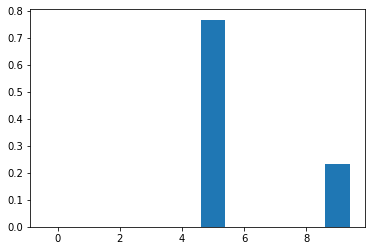

In [50]:
plt.bar(range(10),y_pred[ix][0])